In [1]:
from pandas import Series, DataFrame 
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('C-L2_two_cars.csv')
df.head()

Date          Time  ErrorCode  TransmitterCount  Rpm  PulseType  \
0  2017-08-07  17:19:36:072          0              2263  900          1   
1  2017-08-07  17:19:36:076          0              2264  900          1   
2  2017-08-07  17:19:36:084          0              2265  900          1   
3  2017-08-07  17:19:36:088          0              2266  900          1   
4  2017-08-07  17:19:36:100          0              2267  900          1   

   Temp  ScanDataCount  LeftRight  IndexData      ...        FrontDist.203  \
0    50            204          0          1      ...              65000.0   
1    51            204          1          1      ...              65000.0   
2    51            205          0          1      ...              65000.0   
3    51            205          1          1      ...              65000.0   
4    51            204          0          1      ...              65000.0   

   FrontLevel.203  RearDist.203  RearLevel.203  Unnamed: 1233  Unnamed: 1234  \
0             1.0       65000.0            1.0            NaN            NaN   
1             1.0       65000.0            1.0            NaN            NaN   
2             1.0       65000.0            1.0          205.0        13982.0   
3             1.0       65000.0            1.0          205.0        14138.0   
4             1.0       65000.0            1.0            NaN            NaN   

   Unnamed: 1235  Unnamed: 1236  Unnamed: 1237  Unnamed: 1238  
0            NaN            NaN            NaN            NaN  
1            NaN            NaN            NaN            NaN  
2        65000.0            1.0        65000.0            1.0  
3        65000.0            1.0        65000.0            1.0  
4            NaN            NaN            NaN            NaN  

[5 rows x 1239 columns]

관심있는 컬럼만 뽑아서 데이터프레임을 다시 생성한다.
각도 데이터는 IndexData.1, Angle.1, FrontDist.1, FrontLevel.1, RearDist.1, RearLevel.1와 같이 자동으로 컬럼 이름끝에 구분 인덱스 번호가 1부터 부여된다.
커럼 갯수는 202개만 우선 추출한다.

In [3]:
df2 = df[df['LeftRight'] == 0]
print('df.count={} df2.count={}'.format(len(df), len(df2)))

df.count=201 df2.count=101


In [4]:
df2.head()

Date          Time  ErrorCode  TransmitterCount  Rpm  PulseType  \
0  2017-08-07  17:19:36:072          0              2263  900          1   
2  2017-08-07  17:19:36:084          0              2265  900          1   
4  2017-08-07  17:19:36:100          0              2267  900          1   
6  2017-08-07  17:19:36:112          0              2269  900          1   
8  2017-08-07  17:19:36:124          0              2271  900          1   

   Temp  ScanDataCount  LeftRight  IndexData      ...        FrontDist.203  \
0    50            204          0          1      ...              65000.0   
2    51            205          0          1      ...              65000.0   
4    51            204          0          1      ...              65000.0   
6    51            204          0          1      ...              65000.0   
8    51            205          0          1      ...              65000.0   

   FrontLevel.203  RearDist.203  RearLevel.203  Unnamed: 1233  Unnamed: 1234  \
0             1.0       65000.0            1.0            NaN            NaN   
2             1.0       65000.0            1.0          205.0        13982.0   
4             1.0       65000.0            1.0            NaN            NaN   
6             1.0       65000.0            1.0            NaN            NaN   
8             1.0       65000.0            1.0          205.0        14026.0   

   Unnamed: 1235  Unnamed: 1236  Unnamed: 1237  Unnamed: 1238  
0            NaN            NaN            NaN            NaN  
2        65000.0            1.0        65000.0            1.0  
4            NaN            NaN            NaN            NaN  
6            NaN            NaN            NaN            NaN  
8        65000.0            1.0        65000.0            1.0  

[5 rows x 1239 columns]

In [5]:
columns = ['Time', 'ScanDataCount']
for n in range(1, 203):
    columns.append('Angle.%d' % n)
    columns.append('RearDist.%d' % n)
df3 = df2[columns]
df3.head()

Time  ScanDataCount  Angle.1  RearDist.1  Angle.2  RearDist.2  \
0  17:19:36:072            204      330       65000      330       65000   
2  17:19:36:084            205      308       65000      308       65000   
4  17:19:36:100            204      392       65000      392       65000   
6  17:19:36:112            204      336       65000      336       65000   
8  17:19:36:124            205      350       65000      350       65000   

   Angle.3  RearDist.3  Angle.4  RearDist.4      ...       Angle.198  \
0      330       65000      330       65000      ...           14006   
2      308       65000      308       65000      ...           13982   
4      392       65000      392       65000      ...           14068   
6      336       65000      336       65000      ...           13978   
8      350       65000      350       65000      ...           13920   

   RearDist.198  Angle.199  RearDist.199  Angle.200  RearDist.200  Angle.201  \
0         65000      14006         65000      14006         65000      14006   
2         65000      13982         65000      13982         65000      13982   
4         65000      14068         65000      14068         65000      14068   
6         65000      13978         65000      13978         65000      13978   
8         65000      13992         65000      14026         65000      14026   

   RearDist.201  Angle.202  RearDist.202  
0         65000      14006         65000  
2         65000      13982         65000  
4         65000      14068         65000  
6         65000      13978         65000  
8         65000      14026         65000  

[5 rows x 406 columns]

In [6]:
df3.iloc[0].head()

Time             17:19:36:072
ScanDataCount             204
Angle.1                   330
RearDist.1              65000
Angle.2                   330
Name: 0, dtype: object

65000 값을 NaN으로 변경

In [7]:
df4 = df3.copy()
for c in df4.columns:
    df4[c] = df4[c].replace(65000, np.NaN)

도표로 출력하기 위해 Angle과 distance 값을 뽑음

In [16]:
def angles_and_distances(row_serial):
    angles = list()
    distances = list()
    for idx in row_serial.index:
        if 'Angle.' in idx:
            angles.append(row_serial[idx]/100)
        if 'RearDist.' in idx:
            distances.append(row_serial[idx])
    return angles, distances

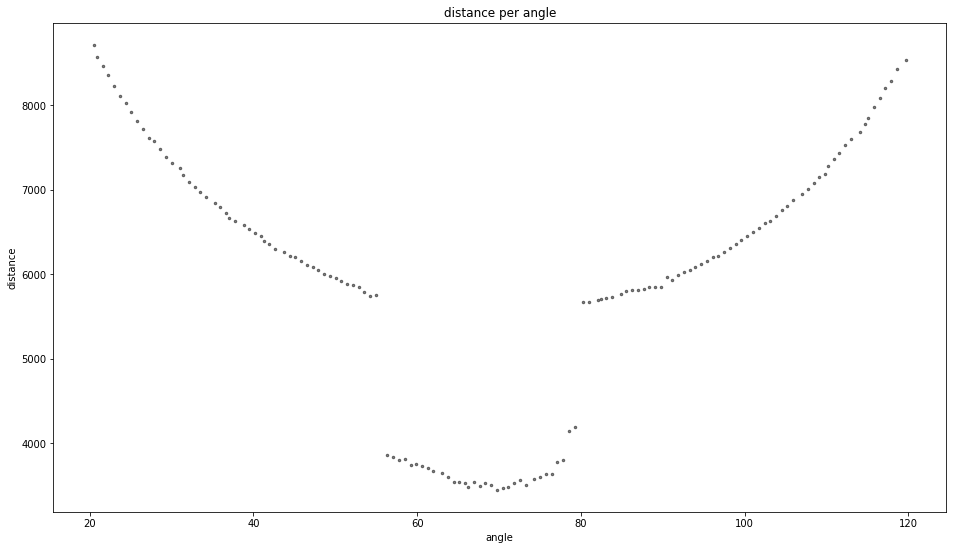

In [17]:
import matplotlib.pyplot as plt
angles, distances = angles_and_distances(df4.iloc[25])
colors = (0,0,0)
area = np.pi*2
plt.figure(figsize=(16,9))
plt.scatter(angles, distances, s=area, c=colors, alpha=0.5)
plt.title('distance per angle')
plt.xlabel('angle')
plt.ylabel('distance')
plt.show()

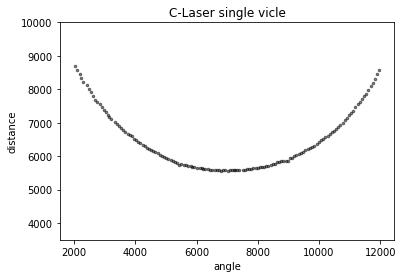

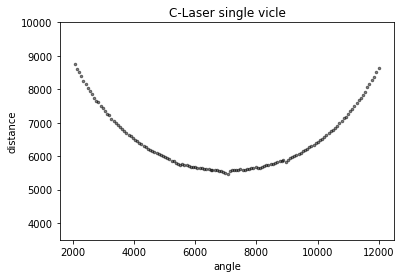

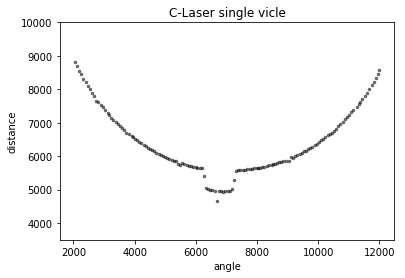

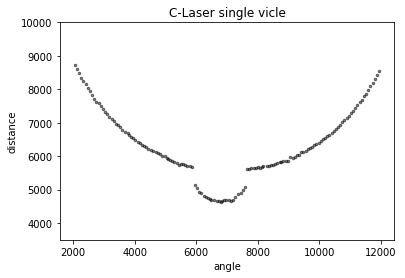

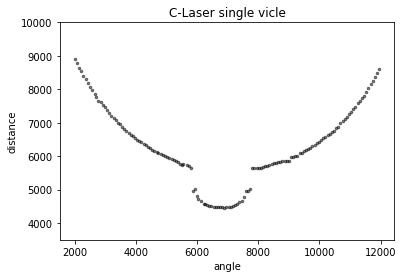

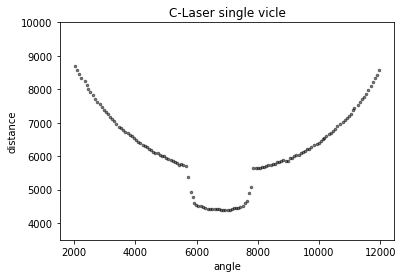

In [10]:
for row in df4.iloc[:6].iterrows():
    angles, distances = angles_and_distances(row[1])
    colors = (0,0,0)
    area = np.pi*2
    plt.scatter(angles, distances, s=area, c=colors, alpha=0.5)
    plt.title('C-Laser single vicle')
    plt.xlabel('angle')
    plt.ylabel('distance')
    #plt.xlim(-2, 2)
    plt.ylim(3500, 10000)
    plt.show()

In [11]:
# 높이를 구하는 함수
def compute_height(arc_degree, distance):
    # x radian = x * 180 / π degree
    # (rad*3.141592f)/180.0f
    
    # 밀리 각도를 실제 각도로 변경 ==> 512 --> 5.12도
    arc_degree = arc_degree / 100.
    height = distance * np.sin((arc_degree*np.pi)/180.0)
    return height

#compute_height(6000, 3)

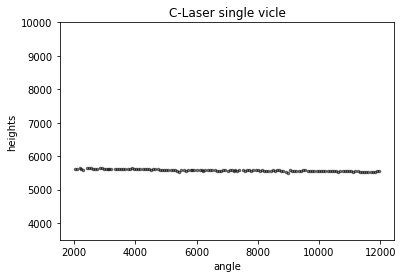

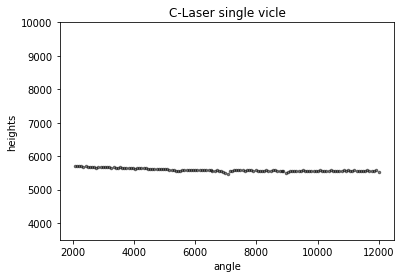

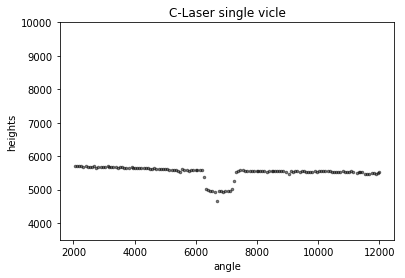

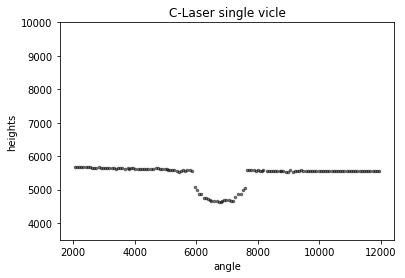

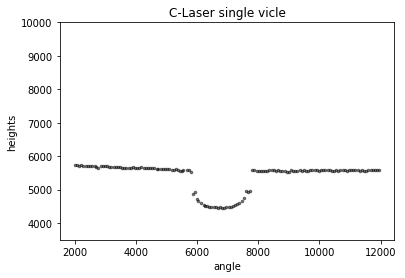

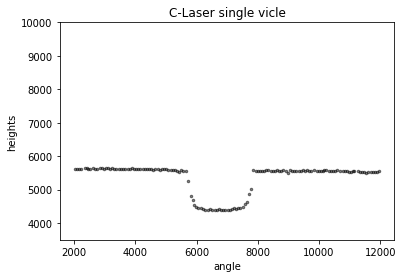

In [12]:
for row in df4.iloc[:6].iterrows():
    angles, distances = angles_and_distances(row[1])
    heights = []
    for i in range(len(angles)):
        heights.append(compute_height(angles[i] + 2000, distances[i]))
    colors = (0,0,0)
    area = np.pi*2
    plt.scatter(angles, heights, s=area, c=colors, alpha=0.5)
    plt.title('C-Laser single vicle')
    plt.xlabel('angle')
    plt.ylabel('heights')
    #plt.xlim(-2, 2)
    plt.ylim(3500, 10000)
    plt.show()